# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Regressão-Softmax-com-dados-NMIST-no-Keras" data-toc-modified-id="Regressão-Softmax-com-dados-NMIST-no-Keras-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Regressão Softmax com dados NMIST no Keras</a></div><div class="lev2 toc-item"><a href="#Import-the-libraries" data-toc-modified-id="Import-the-libraries-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import the libraries</a></div><div class="lev2 toc-item"><a href="#Lendo-os-dados" data-toc-modified-id="Lendo-os-dados-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Lendo os dados</a></div><div class="lev1 toc-item"><a href="#Reorganizando-e-normalizando-os-dados" data-toc-modified-id="Reorganizando-e-normalizando-os-dados-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Reorganizando e normalizando os dados</a></div><div class="lev3 toc-item"><a href="#Usando-apenas-500-para-treinamento-e-100-para-teste" data-toc-modified-id="Usando-apenas-500-para-treinamento-e-100-para-teste-201"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Usando apenas 500 para treinamento e 100 para teste</a></div><div class="lev2 toc-item"><a href="#Convertendo-o-vetor-de-classes-para-codificação-one-hot" data-toc-modified-id="Convertendo-o-vetor-de-classes-para-codificação-one-hot-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Convertendo o vetor de classes para codificação one-hot</a></div><div class="lev2 toc-item"><a href="#Definindo-o-modelo" data-toc-modified-id="Definindo-o-modelo-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Definindo o modelo</a></div><div class="lev2 toc-item"><a href="#Compilando-o-modelo" data-toc-modified-id="Compilando-o-modelo-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Compilando o modelo</a></div><div class="lev2 toc-item"><a href="#Plotando-curva-de-perda-durante-treinamento" data-toc-modified-id="Plotando-curva-de-perda-durante-treinamento-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Plotando curva de perda durante treinamento</a></div><div class="lev2 toc-item"><a href="#Calculando-o-desempenho-tanto-no-conjunto-de-treino-como-no-conjunto-de-teste" data-toc-modified-id="Calculando-o-desempenho-tanto-no-conjunto-de-treino-como-no-conjunto-de-teste-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Calculando o desempenho tanto no conjunto de treino como no conjunto de teste</a></div><div class="lev2 toc-item"><a href="#Imprimindo-Matriz-de-Confusão" data-toc-modified-id="Imprimindo-Matriz-de-Confusão-26"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Imprimindo Matriz de Confusão</a></div>

# Regressão Softmax com dados NMIST no Keras

Este notebook implementa a Regressão Softmax utilizando o Keras.

## Import the libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

## Lendo os dados

Keras also offers a collection of datasets that can be used to train and test the model. The MNIST set is a part of the available datasets and can be loaded as shown below.

In [2]:
from keras.datasets import mnist 
# the data, shuffled and split between train and test sets 
(X_train_orig, y_train), (X_test_orig, y_test) = mnist.load_data()

Using TensorFlow backend.


## Reorganizando e normalizando os dados

In [3]:
k = nb_classes = 10
(n,height,width) = X_train_orig.shape  # deve ser 60000 amostras de 28 x 28 pixels
m = input_dim = height * width
print('n. amostras treinamento:',n,'n. classes:',k,'n. de atributos:',m)
print('X_train_orig shape original:', X_train_orig.shape)
X_train = X_train_orig.reshape(n, input_dim)/255. 
print('X_train novo shape:', X_train.shape)
X_test = X_test_orig.reshape(10000, input_dim)/255.

n. amostras treinamento: 60000 n. classes: 10 n. de atributos: 784
X_train_orig shape original: (60000, 28, 28)
X_train novo shape: (60000, 784)


### Usando apenas 500 para treinamento e 100 para teste

Para ficar igual ao exemplo usando programação matricial

In [4]:
X_train = X_train[:500]
y_train = y_train[:500]
X_test  = X_test[:100]
y_test  = y_test[:100]

## Convertendo o vetor de classes para codificação one-hot

In [5]:
from keras.utils import np_utils 
Y_train = np_utils.to_categorical(y_train, nb_classes) 
Y_test = np_utils.to_categorical(y_test, nb_classes)
print(y_train[0:5])
print(Y_train[0:5])

[5 0 4 1 9]
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


## Definindo o modelo

In [15]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.optimizers import SGD
output_dim = nb_classes = 10 
model = Sequential() 
model.add(Dense(output_dim, input_dim=input_dim, activation='softmax')) 
batch_size = 500
epochs = 1000

## Compilando o modelo

In [16]:
sgd = SGD(lr= 0.5, decay=0e-6, momentum=0., nesterov=False)
model.compile(optimizer=sgd, loss='categorical_crossentropy') 
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,verbose=0) 
loss = model.evaluate(X_test, Y_test, verbose=0)
print('loss:',loss)

loss: 0.384124416113


## Plotando curva de perda durante treinamento

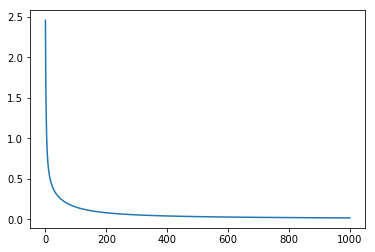

In [17]:
plt.plot(history.history['loss'])

## Calculando o desempenho tanto no conjunto de treino como no conjunto de teste

In [12]:
def getAccuracy(X,Y):
    Y_hat = model.predict_classes(X)
    accuracy = sum(Y_hat == Y)/(float(len(Y)))
    return accuracy

train_ac = getAccuracy(X_train,y_train)
test_ac  = getAccuracy(X_test,y_test)
print() 
print('Training Accuracy: ', train_ac)
print('Test Accuracy: ', test_ac)
# usual 0.868 e 0.77

 32/100 [========>.....................] - ETA: 0s
Training Accuracy:  1.0
Test Accuracy:  0.84


## Imprimindo Matriz de Confusão

In [14]:
y_hat = model.predict_classes(X_test)
print(y_hat.shape)
print('y_hat: ',y_hat[:20])
print('y_test:',y_test[:20])
print(y_test.shape)
pd.crosstab(y_hat, y_test)

 32/100 [========>.....................] - ETA: 0s(100,)
y_hat:  [7 2 1 0 4 1 9 9 2 9 0 6 9 0 1 3 7 7 3 4]
y_test: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
(100,)


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,8,0,0,0,0,0,0,0,0,0
1,0,14,0,0,0,0,0,0,0,0
2,0,0,7,0,0,1,1,1,0,0
3,0,0,1,11,0,2,0,0,0,0
4,0,0,0,0,11,1,0,0,0,0
5,0,0,0,0,0,2,0,0,1,0
6,0,0,0,0,1,0,9,0,0,0
7,0,0,0,0,0,1,0,12,0,2
8,0,0,0,0,0,0,0,0,1,0
